## Module 2 - Approximate inference in graphical models

### Part A - Bayesian inference in a Beta-Bernoulli model
This notebook introduces a simple Bayesian model for estimating the probability of heads in a coin flip. It doesn't contain any actual exercises, but if you have little or no experience with Bayesian statistics it will help you to understand the basics needed to solve the actual preparatory exercise (Part B).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#### The problem
Consider the (very simple) problem of estimating the probability of heads in a coin flip, denoted by $\theta \in [0,1]$. Let $X=1$ denote heads and $X=0$ tails. We observe a sequence of flips resulting in HHTH,

In [5]:
data = np.array([1,1,0,1])

The maximum likelihood estimate of $\theta$ is simply the sampling frequency,

In [6]:
thetaML = data.mean()
print("Theta ML = {}".format(thetaML))

Theta ML = 0.75


#### The Bayesian approach
Clearly, the amount of available data is not enough for us to really trust this estimate. As an alternative, we can take a Bayesian approach, in which we assign a prior distribution $p(\theta)$  for the unknown parameter (here, the probability of heads), and then condition on the data to compute the posterior belief $$p(\theta|D) = \frac{p(D\mid \theta)p(\theta)}{p(D)},$$ where $D$ represents the observed data.

In our example, $\theta$ represents a probability and it is therefore constrained to the interval $[0,1]$. We therefore need to pick a prior disribution with support only on this interval. A convenient choice is the Beta distribution,
$$
p(\theta) = \text{Beta}(\theta \mid \alpha, \beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}.
$$
Note that the Beta distribution has two shape (hyper-)parameters $\alpha > 0$, $\beta > 0$. You can use the cell below to plot the PDF for different values of these hyperparameters.

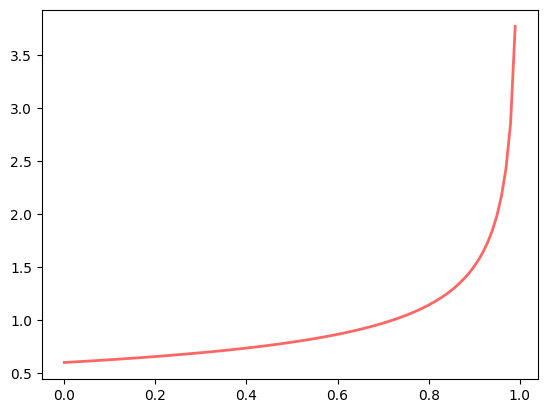

In [7]:
a = 1
b = .6
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, alpha=0.6)
plt.show()

**Remark.** The Beta distribution can be though of as a *distribution over distributions*. A draw from the Beta distribution is always a number between 0 and 1, which we can view as the parameter of a Bernoulli distribution (a "coin-flip"). We will use this notion of *distributions over distributions* in the course module, so it is good to get your head around. Specifically, we will use the Dirichlet distribution as a prior over discrete probability vectors, which can be thought of as a multivariate generalization of the Beta distribution. More on this in Part B.

#### Computing the posterior
Note that the distribution of $X$ given $\theta$ is a Bernoulli distribution with parameter $\theta$,
$$
p(X=k|\theta) = \theta^{k}(1-\theta)^{1-k}, \quad k\in\{0,1\}
$$
which means that the likelihood of our observed data is
$$
p(D|\theta) = p(HHTH|\theta) = \theta^3 (1-\theta).
$$
We can then compute the posterior distribution as,
$$
p(\theta|D) \propto p(\theta, D) = p(D|\theta) \text{Beta}(\theta | \alpha,\beta) \\
\propto 
\theta^3 (1-\theta) \theta^{\alpha-1}(1-\theta)^{\beta-1} \\
\propto
\text{Beta}(\theta | \alpha+3,\beta+1).
$$

**Remark.** The calculation above illustrates some of the standard steps often taken in Bayesian analysis:
* First, note that the posterior PDF is proportional to the joint PDF of both the unknown parameter and the observed data. Write this joint PDF as the product between prior and likelihood.
* Remove all factors that don't depend on $\theta$ - we only have an expression up to proportionality anyway!
* Identify the resulting expression as an *unnormalized* PDF of some standard form. The constant that we have neglected must correspond to the normalizing constant of this standard PDF, ensuring that it integrates to 1.

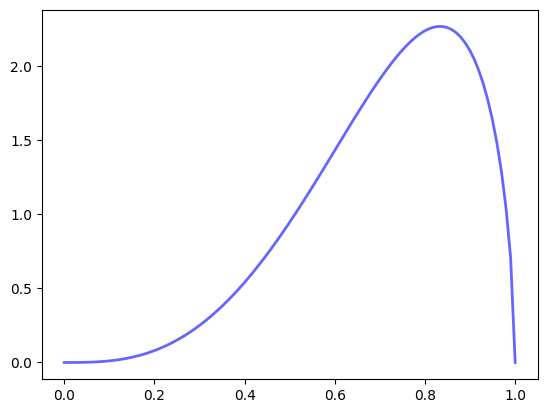

In [8]:
plt.plot(x, beta.pdf(x, a+3, b+1), 'b-', lw=2, alpha=0.6)
plt.show()

Plotting the posterior PDF, we see that it has put more probability mass (higher degree of belief) around values close to 0.75, corresponding to the maximum-likelihood estimate. However, there is still signigicant uncertainty about the value of $\theta$, represented by the spread of the distribution, which reflects the fact that we have only seen the result of 4 coin tosses.

**Remark.** In the example above, the posterior distribution turned out to be of the same form as the prior (both are Beta distributions), but with updated hyperparameters (for each observed heads we increase $\alpha$ by one, and for each observed tails we increase $\beta$ by one). This property--that the posterior is of the same form as the prior--is referred to as conjugacy. We say that the Beta distribution is a conjugate prior for the Bernoulli likelihood. Conjugacy is convenient, since it leads to closed form expressions for the posterior.

Say that we, for instance, observe another batch of data $D_2 = $THTH, then we can continue to update the posterior distribution analogously,
$$
p(\theta|D,D_2) \propto p(D_2 |\theta) p(\theta | D) \propto \text{Beta}(\theta | \alpha+5,\beta+3).
$$

Let's finish this notebook by doing some simulations on the Beta-Bernoulli model.

In [ ]:
theta0 = 0.6 # True probability of heads (in a simulation there is a "truth")
N = 10 # Number of observations

# Binomial with n=1 trials is equivalent to a Bernoulli.
# Another possibility would be to generate a binomial draw with n=N and size=1
# (binomial is also conjugate to the Beta), but we use this approach to be
# consistent with the derivation above
data = np.random.binomial(size=N, n=1, p=theta0)

# Prior
a = 1.
b = 1.

# Posterior
ap = a + np.sum(data==1)
bp = b + np.sum(data==0)

# Plot prior and posterior pdf
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, alpha=0.6)
plt.plot(x, beta.pdf(x, ap, bp), 'b-', lw=2, alpha=0.6)
plt.legend(['Prior','Posterior'])
plt.show()